## 01 Import used libraries

In [1]:
# required and used Libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score

from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

## 02 Used Functions for feature engineering

*   Get dataframes data removing unwanted labels and null data

In [2]:
from scipy.linalg import dft
def getTrainTestdata(df, required_label, removing_labels):

  # removeing null values and not required labels
  df = df.drop(removing_labels, axis =1).dropna()

  return df, df.pop(required_label)

*   Random Forest Classifier used to create the model


In [3]:
def useRandommForestModel(X_train, y_train, X_test):
  # Define model. Specify a number for random_state to ensure same results each run
  model = RandomForestClassifier(random_state=1)

  # Fit model
  model.fit(X_train, y_train)

  # predict values using model
  predict_val = model.predict(X_test)

  return predict_val

*   K-Nearest Neighbor used to create the model

In [4]:
def useKNN(X_train, y_train, X_test, n_neighbors = 5):
  # Create and train your KNN classifier model
  # You can perform hyperparameter tuning by changing the value of 'n_neighbors'
  knn = KNeighborsClassifier(n_neighbors)
  knn.fit(X_train, y_train)
  y_pred = knn.predict(X_test)
  return y_pred

  # create KNN model
  # classifier = KNeighborsClassifier(n_neighbors=5)
  # classifier.fit(X_train, y_train)
  # y_pred = classifier.predict(X_test)
  # return y_pred

*   create a model using support vector machine using **sklearn.svm**

In [5]:
from sklearn.svm import SVC
def useSVM(X_train, y_train, X_test, class_weight = None):
  # standardize the data set
  svc = SVC(kernel="linear", class_weight = class_weight)

  svc.fit(X_train, y_train)
  y_pred = svc.predict(X_test)
  return y_pred

*   Gausian Naive Bayes used to create the model

In [6]:
from sklearn.linear_model import LogisticRegression
def useLRC(X_train, y_train, X_test, class_weight= None):
  lrc = LogisticRegression(random_state=0, class_weight= "balanced")
  lrc.fit(X_train, y_train)
  y_pred = lrc.predict(X_test)
  return y_pred

* Get the accuracy and report of the predictions

In [7]:
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score

def getSummary(y_test, predict_val):
    print(confusion_matrix(y_test, predict_val))
    print(f"Accuracy: {accuracy_score(y_test, predict_val)}")
    print(f"F1 Score: {f1_score(y_test, predict_val, average='weighted')}")
    print(f"Precision: {precision_score(y_test, predict_val, average='weighted')}")
    print(f"Recall: {recall_score(y_test, predict_val, average='weighted')}")
    return [f"Accuracy: {accuracy_score(y_test, predict_val)}", f"F1 Score: {f1_score(y_test, predict_val, average='weighted')}",f"Precision: {precision_score(y_test, predict_val, average='weighted')}", f"Recall: {recall_score(y_test, predict_val, average='weighted')}"]
  # # get the mean absolute error of the model
  # MAE = mean_absolute_error(y_test, predict_val)

  # # get the accuracy of the model
  # accuracy = accuracy_score(y_test, predict_val)
  # report = classification_report(y_test, predict_val)
  # return MAE, report,accuracy

*   select best K number of features using sklearn **SelectBest** function which uses **f_regression**

In [8]:
from sklearn.feature_selection import SelectKBest

from sklearn.feature_selection import f_regression

def getSelectedFeatures(k, X_train, y_train):
  # define number of features to keep "k"

  # perform feature selection
  X_new = SelectKBest(f_regression, k=k).fit_transform(X_train, y_train)

  # get feature names of selected features
  selected_features = X_train.columns[SelectKBest(f_regression, k=k).fit(X_train, y_train).get_support()]

  return selected_features

*   Add a ***Principal Component Analysis(PCA)*** and get additional features by finding principal components

In [9]:
from sklearn.decomposition import PCA
def apply_pca(n_Components, X_train, X_test, X_test_predict, standardize=True):
    # Standardize
    if standardize:
        X_train = (X_train - X_train.mean(axis=0)) / X_train.std(axis=0)
    # Create principal components
    pca = PCA(n_Components, svd_solver='full')
    pca.fit(X_train)
    X_train_pca = pca.transform(X_train)
    X_test_pca = pca.transform(X_test)
    X_test_predict_pca = pca.transform(X_test_predict)
    # Convert to dataframe
    component_names = [f"PC{i+1}" for i in range(X_train_pca.shape[1])]
    X_train_pca = pd.DataFrame(X_train_pca, columns=component_names)
    X_test_pca = pd.DataFrame(X_test_pca, columns=component_names)
    X_test_predict_pca = pd.DataFrame(X_test_predict_pca, columns=component_names)
    # Create loadings
    # loadings = pd.DataFrame(
    #     pca.components_.T,  # transpose the matrix of loadings
    #     columns=component_names,  # so the columns are the principal components
    #     index=X_train.columns,  # and the rows are the original features
    # )
    return pca, X_train_pca, X_test_pca, X_test_predict_pca

## 03 Reducing features by feature engineering of Label 01



###Get dataset and remove un wanted labels

In [10]:
train = pd.read_csv("drive/MyDrive/ML_Project/train.csv")
test = pd.read_csv("drive/MyDrive/ML_Project/valid.csv")
test_predict = pd.read_csv("drive/MyDrive/ML_Project/test.csv")


X_train_label1, y_train_label1= getTrainTestdata(train, "label_2",['label_1','label_3','label_4'])
X_test_label1, y_test_label1  = getTrainTestdata(test, "label_2",['label_1','label_3','label_4'])
X_test_predict_label1  = test_predict.drop('ID', axis =1).dropna()

# standardize the data set
scaler = StandardScaler()
scaler.fit(X_train_label1)

component_names = X_train_label1.columns

 # scale the data set using new scale
X_train_label1 = pd.DataFrame(scaler.transform(X_train_label1), columns=component_names)
X_test_label1 =  pd.DataFrame(scaler.transform(X_test_label1), columns=component_names)
X_test_predict_label1 = pd.DataFrame(scaler.transform(X_test_predict_label1), columns=component_names)

X_train_label1.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_759,feature_760,feature_761,feature_762,feature_763,feature_764,feature_765,feature_766,feature_767,feature_768
0,0.231211,2.642264,-0.783721,-0.200963,-0.252434,1.008901,0.760148,-1.364605,-0.471317,0.761644,...,-0.915237,-0.594702,2.005396,-1.811812,-0.396138,1.166484,-1.357635,-1.407028,-2.425916,-0.452793
1,0.073673,-0.872519,-0.866584,-0.290246,-0.089438,-0.316408,-0.517084,-1.510807,0.790751,-0.326309,...,0.883469,-0.778551,-1.047538,-0.723507,-1.528824,-0.671650,0.376430,-0.294145,-1.023836,2.122323
2,1.877123,-0.568789,0.945463,-0.129143,-0.190177,1.405215,0.486717,-0.865055,-1.100958,-1.374476,...,0.982273,0.028295,-0.681026,0.447893,-0.629863,-0.022081,-0.230827,0.216080,0.797605,0.208926
3,0.426911,-0.982319,0.210458,0.793414,-0.155321,-0.808089,1.133387,0.471021,-1.284668,0.592059,...,0.479109,-1.483100,0.714302,-0.715283,-0.243350,0.706130,-1.852903,0.806580,1.023816,0.264083
4,-0.798511,0.901085,-0.421150,0.532452,1.292748,0.779860,-0.229668,-0.477290,0.393882,0.214788,...,-0.922036,-1.492718,0.159138,0.014168,0.369548,-0.095106,0.042260,0.493798,-1.159322,0.789358


<Axes: >

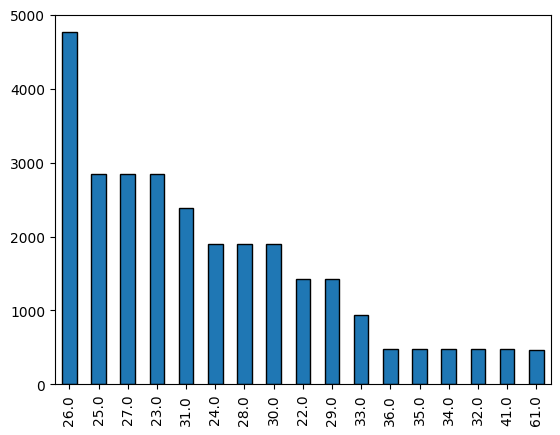

In [11]:
y_train_label1.value_counts().plot(kind='bar', edgecolor='black')

<Axes: >

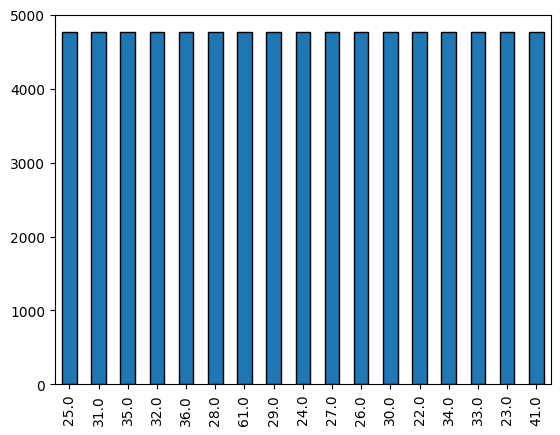

In [12]:
from imblearn.over_sampling import RandomOverSampler

RandomOversamples = RandomOverSampler(random_state=2)
X_train_label1_balanced, y_train_label1_balanced = RandomOversamples.fit_resample(X_train_label1, y_train_label1)
y_train_label1_balanced.value_counts().plot(kind='bar', edgecolor='black')

### create a model using Random KNN before feature engineering

In [13]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = useKNN(X_train_label1, y_train_label1, X_test_label1)
Summary = getSummary(y_test_label1, y_pred)


[[ 30   1   1   0   3   0   0   1   0   0   0   0   0   0   0   0   0]
 [  4  60   1   1   4   0   0   0   0   0   0   0   0   0   0   1   0]
 [  1   2  39   1   1   0   0   0   0   1   0   1   0   0   0   0   0]
 [  1   1   2  64   5   3   0   0   1   1   0   0   0   0   1   0   0]
 [  0   1   2   1 108   1   1   0   0   0   1   0   0   0   0   0   0]
 [  2   5   1   0   1  70   0   1   1   0   0   0   0   0   0   0   0]
 [  0   0   0   0   2   2  41   0   0   0   0   0   0   0   1   0   0]
 [  1   1   0   0   2   1   0  40   0   0   0   0   0   0   0   0   0]
 [  0   2   0   2   3   0   2   0  37   1   0   1   0   0   0   0   0]
 [  2   0   1   1   3   0   0   0   0  58   0   0   0   0   0   0   0]
 [  0   0   0   1   0   0   0   0   0   0  10   0   0   0   0   0   0]
 [  0   0   1   0   2   0   0   0   0   0   0  27   0   0   0   0   0]
 [  0   0   0   0   2   0   1   0   0   0   0   0   8   0   0   0   0]
 [  0   0   0   0   2   0   0   0   0   0   0   0   0   9   0   0   0]
 [  0 

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = useKNN(X_train_label1_balanced, y_train_label1_balanced, X_test_label1)
Summary = getSummary(y_test_label1, y_pred)

[[31  0  1  1  2  0  0  1  0  0  0  0  0  0  0  0  0]
 [ 3 61  1  1  3  0  0  0  0  0  0  1  0  0  0  1  0]
 [ 1  2 39  0  1  1  0  0  0  1  0  1  0  0  0  0  0]
 [ 0  2  2 65  4  1  1  0  1  2  0  1  0  0  0  0  0]
 [ 0  2  4  2 97  1  1  3  0  2  2  0  0  0  1  0  0]
 [ 2  3  1  0  1 67  2  1  2  1  0  0  1  0  0  0  0]
 [ 0  1  0  1  0  2 37  1  0  1  1  0  0  0  1  1  0]
 [ 0  1  0  0  0  1  0 43  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  1  0  3  0 40  0  0  1  0  0  1  0  1]
 [ 1  0  2  1  1  0  0  1  0 55  3  0  0  0  1  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 11  0  0  0  0  0  0]
 [ 0  0  1  0  0  0  0  0  1  0  0 28  0  0  0  0  0]
 [ 0  0  0  0  0  0  1  0  0  0  0  0 10  0  0  0  0]
 [ 0  0  0  0  1  0  0  0  0  0  0  0  0 10  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  8  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 14  0]
 [ 0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0 18]]
Accuracy: 0.8614130434782609
F1 Score: 0.8619519994524114
Precision: 0.8666749545

### create a model using Random SVC before feature engineering

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = useSVM(X_train_label1, y_train_label1, X_test_label1)
Summary = getSummary(y_test_label1, y_pred)


[[31  2  0  0  1  0  0  0  0  1  0  1  0  0  0  0  0]
 [ 1 54  3  6  2  1  1  0  0  3  0  0  0  0  0  0  0]
 [ 0  2 37  1  2  1  0  0  1  1  1  0  0  0  0  0  0]
 [ 0  6  2 62  5  0  1  0  3  0  0  0  0  0  0  0  0]
 [ 1 10  5  4 90  2  2  0  0  1  0  0  0  0  0  0  0]
 [ 1  3  1  2  2 66  1  1  1  3  0  0  0  0  0  0  0]
 [ 0  2  1  1  1  1 38  0  0  1  0  0  0  0  1  0  0]
 [ 3  1  0  0  4  0  0 36  1  0  0  0  0  0  0  0  0]
 [ 0  2  1  3  2  2  1  0 35  0  1  1  0  0  0  0  0]
 [ 4  0  0  1  3  2  2  0  0 53  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 11  0  0  0  0  0  0]
 [ 0  0  1  0  0  0  0  0  0  0  0 29  0  0  0  0  0]
 [ 0  0  0  0  0  1  0  0  0  0  0  0 10  0  0  0  0]
 [ 0  1  0  0  1  0  0  0  0  0  0  0  0  9  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  8  0  0]
 [ 0  0  0  0  0  0  0  0  1  0  0  0  0  0  0 13  0]
 [ 0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0 18]]
Accuracy: 0.8152173913043478
F1 Score: 0.8167391259518644
Precision: 0.8221277042

In [ ]:
y_pred = useSVM(X_train_label1, y_train_label1, X_test_label1, "balanced")
Summary = getSummary(y_test_label1, y_pred)

[[31  2  0  0  1  0  0  0  0  1  0  1  0  0  0  0  0]
 [ 1 54  3  6  2  1  1  0  0  3  0  0  0  0  0  0  0]
 [ 0  3 36  1  1  1  0  0  1  2  1  0  0  0  0  0  0]
 [ 0  5  3 65  2  0  1  0  3  0  0  0  0  0  0  0  0]
 [ 1 11  5  2 91  2  2  0  0  1  0  0  0  0  0  0  0]
 [ 1  3  1  2  3 65  1  1  2  2  0  0  0  0  0  0  0]
 [ 0  1  1  1  1  1 39  0  0  1  0  0  0  0  1  0  0]
 [ 3  1  1  0  2  0  0 37  1  0  0  0  0  0  0  0  0]
 [ 0  2  1  2  2  1  1  0 37  0  1  1  0  0  0  0  0]
 [ 4  1  0  1  3  2  1  0  0 53  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 11  0  0  0  0  0  0]
 [ 0  0  1  0  0  0  0  0  0  0  0 29  0  0  0  0  0]
 [ 0  0  0  0  0  1  0  0  0  0  0  0 10  0  0  0  0]
 [ 0  1  0  0  1  0  0  0  0  0  0  0  0  9  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  8  0  0]
 [ 0  0  0  0  0  0  0  0  1  0  0  0  0  0  0 13  0]
 [ 0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0 18]]
Accuracy: 0.8233695652173914
F1 Score: 0.8253021360299548
Precision: 0.8310765954

### create a model using Random LRC before feature engineering

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = useLRC(X_train_label1_balanced, y_train_label1_balanced, X_test_label1)
Summary = getSummary(y_test_label1, y_pred)

[[30  1  0  0  1  0  0  1  0  3  0  0  0  0  0  0  0]
 [ 0 51  3  5  3  2  2  0  1  4  0  0  0  0  0  0  0]
 [ 1  2 34  1  1  2  0  1  0  3  0  1  0  0  0  0  0]
 [ 0  2  0 59  4  4  2  0  4  2  0  1  0  0  1  0  0]
 [ 1 11  4  3 82  4  2  2  1  4  1  0  0  0  0  0  0]
 [ 1  2  1  2  0 65  1  2  2  4  0  0  1  0  0  0  0]
 [ 0  2  0  1  0  0 43  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  0  1  0  0 42  1  0  0  0  0  0  0  0  0]
 [ 0  1  0  3  1  1  0  0 39  2  0  0  0  1  0  0  0]
 [ 3  0  0  1  3  1  2  0  0 55  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 11  0  0  0  0  0  0]
 [ 0  0  1  0  0  0  0  0  0  0  0 29  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 11  0  0  0  0]
 [ 0  1  0  0  0  0  0  0  0  0  0  0  0 10  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  8  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 14  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 19]]
Accuracy: 0.8179347826086957
F1 Score: 0.8168996971539108
Precision: 0.8197743533

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = useLRC(X_train_label1, y_train_label1, X_test_label1, "balanced")
Summary = getSummary(y_test_label1, y_pred)

[[28  1  0  1  1  0  0  2  0  3  0  0  0  0  0  0  0]
 [ 0 49  3  6  3  2  2  0  1  5  0  0  0  0  0  0  0]
 [ 1  2 36  1  1  1  0  1  0  2  0  1  0  0  0  0  0]
 [ 0  5  0 56  5  3  2  0  4  2  0  1  0  0  1  0  0]
 [ 1 10  4  2 85  3  2  2  1  4  1  0  0  0  0  0  0]
 [ 1  3  1  2  0 64  1  2  3  3  0  0  1  0  0  0  0]
 [ 0  1  0  1  0  0 44  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  0  1  0  0 42  1  0  0  0  0  0  0  0  0]
 [ 0  1  0  3  1  0  0  0 41  2  0  0  0  0  0  0  0]
 [ 2  0  0  1  4  2  2  0  0 54  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 11  0  0  0  0  0  0]
 [ 0  0  1  0  0  0  0  0  0  0  0 29  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 11  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 11  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  8  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 14  0]
 [ 0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0 18]]
Accuracy: 0.8165760869565217
F1 Score: 0.8155342711034698
Precision: 0.8181430111

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Add KNN predicted data since it has the better accuracy to csv file

In [ ]:
# from sklearn.metrics import classification_report, confusion_matrix

# predicted_values = dict()

# Before_FE_predict_label = useKNN(X_train_label1, y_train_label1, X_test_predict_label1)
# predicted_values['Predicted labels before feature engineering'] = Before_FE_predict_label

### Find best k features and select

    (before selecting features checked if k is enough to achieve a better accuracy and finally come up with k features is enough)

In [14]:
selected_features = getSelectedFeatures(300, X_train_label1, y_train_label1)

# print selected features
print(selected_features)

Index(['feature_1', 'feature_2', 'feature_3', 'feature_5', 'feature_6',
       'feature_7', 'feature_10', 'feature_11', 'feature_12', 'feature_13',
       ...
       'feature_757', 'feature_758', 'feature_759', 'feature_760',
       'feature_761', 'feature_762', 'feature_765', 'feature_766',
       'feature_767', 'feature_768'],
      dtype='object', length=520)


In [15]:
X_train_selected_label1 = X_train_label1[list(selected_features)]
X_test_selected_label1 = X_test_label1[list(selected_features)]
X_test_predict_selected_label1 = X_test_predict_label1[list(selected_features)]

### Check the accuracy of the selected features are enogh or not using KNN

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = useKNN(X_train_selected_label1, y_train_label1, X_test_selected_label1)
Summary = getSummary(y_test_label1, y_pred)

print("using KNN after redusing the features to create model: ")
print(classification_report)

[[ 29   1   1   0   4   0   0   1   0   0   0   0   0   0   0   0   0]
 [  4  60   1   1   3   0   0   0   0   1   0   0   0   0   0   1   0]
 [  1   3  38   1   1   1   0   0   0   0   0   1   0   0   0   0   0]
 [  1   1   1  65   4   3   0   0   1   2   0   0   0   0   1   0   0]
 [  0   0   2   1 110   1   1   0   0   0   0   0   0   0   0   0   0]
 [  1   6   1   0   1  69   0   1   1   1   0   0   0   0   0   0   0]
 [  0   1   1   1   1   1  39   1   0   0   0   0   0   0   1   0   0]
 [  0   1   0   0   2   2   0  40   0   0   0   0   0   0   0   0   0]
 [  0   1   0   2   4   0   2   0  37   1   0   1   0   0   0   0   0]
 [  3   0   1   1   3   0   0   0   0  57   0   0   0   0   0   0   0]
 [  0   0   0   1   0   0   0   0   0   0  10   0   0   0   0   0   0]
 [  0   0   1   0   2   0   0   0   0   0   0  27   0   0   0   0   0]
 [  0   0   0   0   2   0   1   0   0   0   0   0   8   0   0   0   0]
 [  0   0   0   0   2   0   0   0   0   0   0   0   0   9   0   0   0]
 [  0 

### Check the accuracy of the selected features are enogh or not using SVC

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = useSVM(X_train_selected_label1, y_train_label1, X_test_selected_label1)
Summary = getSummary(y_test_label1, y_pred)

print("using SVM after redusing the features to create model: ")
print(classification_report)

[[31  1  0  1  1  1  0  1  0  0  0  0  0  0  0  0  0]
 [ 1 48  1  5  6  2  3  2  2  1  0  0  0  0  0  0  0]
 [ 3  2 28  1  5  4  1  0  1  0  0  1  0  0  0  0  0]
 [ 0  5  1 54 10  3  2  0  2  2  0  0  0  0  0  0  0]
 [ 2  8  5 10 82  2  1  1  0  3  0  0  0  0  1  0  0]
 [ 1  7  2  4  9 49  2  1  2  3  0  1  0  0  0  0  0]
 [ 0  1  1  1  6  2 34  0  0  1  0  0  0  0  0  0  0]
 [ 3  0  2  0  4  2  1 32  1  0  0  0  0  0  0  0  0]
 [ 0  3  0  3  2  3  1  0 34  1  1  0  0  0  0  0  0]
 [ 1  1  2  4  3  3  2  0  0 49  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 11  0  0  0  0  0  0]
 [ 0  0  2  0  0  0  0  0  1  0  0 26  0  0  1  0  0]
 [ 0  0  1  0  0  0  0  0  0  0  0  0 10  0  0  0  0]
 [ 0  1  0  0  1  0  0  0  0  0  0  0  0  9  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  8  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 14  0]
 [ 0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0 18]]
Accuracy: 0.7296195652173914
F1 Score: 0.730681143454107
Precision: 0.73604988479

### Create a PCA to create new features using train data

In [41]:
pca, X_train_pca, X_test_pca, X_test_predict_pca = apply_pca(0.99, X_train_label1, X_test_label1, X_test_predict_label1)
print(X_test_pca.keys())
# print(loadings.to_string())

Index(['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10',
       ...
       'PC569', 'PC570', 'PC571', 'PC572', 'PC573', 'PC574', 'PC575', 'PC576',
       'PC577', 'PC578'],
      dtype='object', length=578)


<Axes: >

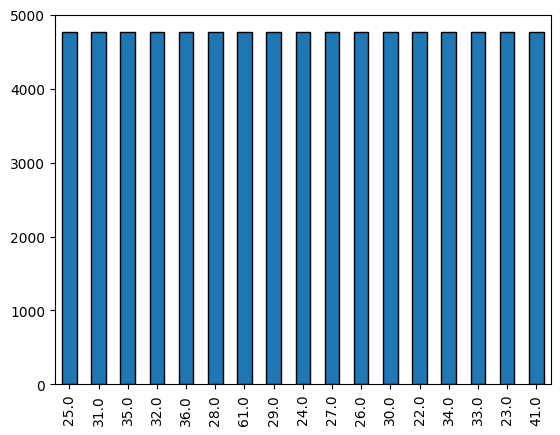

In [50]:
from imblearn.over_sampling import RandomOverSampler

RandomOversamples = RandomOverSampler(random_state=40)
X_train_pca_balanced, y_train_pca_balanced = RandomOversamples.fit_resample(X_train_pca, y_train_label1)
y_train_pca_balanced.value_counts().plot(kind='bar', edgecolor='black')

In [51]:
X_train_pca_balanced.head()
print(X_train_pca_balanced.shape)

(80954, 578)


### Find the status of the model using KNN after joining PCAs

In [52]:
from sklearn.metrics import classification_report, confusion_matrix
y_pred = useKNN(X_train_pca, y_train_label1, X_test_pca, 5)
Summary = getSummary(y_test_label1, y_pred)

print("Mean absolute error after adding new pca features of the model Lable_1: ")

[[ 30   1   1   0   3   0   0   1   0   0   0   0   0   0   0   0   0]
 [  4  60   1   1   4   0   0   0   0   0   0   0   0   0   0   1   0]
 [  1   2  39   1   1   0   0   0   0   1   0   1   0   0   0   0   0]
 [  1   1   2  64   5   3   0   0   1   1   0   0   0   0   1   0   0]
 [  0   1   1   1 109   1   1   0   0   0   1   0   0   0   0   0   0]
 [  2   4   1   0   1  71   0   1   1   0   0   0   0   0   0   0   0]
 [  0   1   0   1   1   2  40   0   0   0   0   0   0   0   1   0   0]
 [  0   1   0   0   2   2   0  40   0   0   0   0   0   0   0   0   0]
 [  0   2   0   2   3   0   2   0  37   1   0   1   0   0   0   0   0]
 [  2   0   1   1   2   0   0   0   0  59   0   0   0   0   0   0   0]
 [  0   0   0   1   0   0   0   0   0   0  10   0   0   0   0   0   0]
 [  0   0   1   0   2   0   0   0   0   0   0  27   0   0   0   0   0]
 [  0   0   0   0   2   0   1   0   0   0   0   0   8   0   0   0   0]
 [  0   0   0   0   1   0   0   0   0   0   0   0   0  10   0   0   0]
 [  0 

In [53]:
from sklearn.metrics import classification_report, confusion_matrix
y_pred = useKNN(X_train_pca_balanced, y_train_pca_balanced, X_test_pca, 6)
Summary = getSummary(y_test_label1, y_pred)

print("Mean absolute error after adding new pca features of the model Lable_1: ")


[[ 33   0   1   1   0   0   0   1   0   0   0   0   0   0   0   0   0]
 [  4  63   1   1   1   0   0   0   0   0   0   1   0   0   0   0   0]
 [  1   2  40   1   0   0   0   1   0   0   0   1   0   0   0   0   0]
 [  2   0   2  62   3   2   3   0   1   3   0   0   0   0   0   1   0]
 [  0   2   1   4 101   1   1   0   1   0   3   0   0   0   1   0   0]
 [  3   3   1   0   0  65   1   4   1   1   0   0   1   1   0   0   0]
 [  0   1   0   1   0   1  41   1   0   0   0   0   0   0   1   0   0]
 [  0   1   0   0   1   2   0  41   0   0   0   0   0   0   0   0   0]
 [  0   2   0   2   0   0   3   0  39   0   0   1   0   0   0   0   1]
 [  1   0   2   1   0   0   0   1   0  57   2   0   0   0   1   0   0]
 [  0   0   0   0   0   0   0   0   0   0  11   0   0   0   0   0   0]
 [  0   0   1   0   0   0   0   0   1   0   0  28   0   0   0   0   0]
 [  0   0   0   0   0   0   1   0   0   0   0   0  10   0   0   0   0]
 [  0   0   0   0   1   0   0   0   0   0   0   0   0  10   0   0   0]
 [  0 

### Find the status of the model using SVC after joining PCAs

In [54]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = useSVM(X_train_pca, y_train_label1, X_test_pca)
Summary = getSummary(y_test_label1, y_pred)

[[31  0  0  0  2  0  0  0  0  2  0  1  0  0  0  0  0]
 [ 0 56  3  5  2  1  2  0  1  1  0  0  0  0  0  0  0]
 [ 1  2 38  2  1  1  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  7  0 58  5  3  1  0  3  0  0  1  0  0  1  0  0]
 [ 0  8  5  2 94  3  0  2  1  0  0  0  0  0  0  0  0]
 [ 1  4  0  4  3 63  1  1  2  2  0  0  0  0  0  0  0]
 [ 0  1  1  1  1  3 38  0  0  0  0  0  0  0  1  0  0]
 [ 3  1  0  1  4  1  0 34  1  0  0  0  0  0  0  0  0]
 [ 0  1  0  2  2  3  0  0 37  0  1  2  0  0  0  0  0]
 [ 5  1  0  2  4  2  1  0  1 49  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 11  0  0  0  0  0  0]
 [ 0  0  1  0  0  0  0  0  0  0  0 29  0  0  0  0  0]
 [ 0  0  0  0  0  1  0  0  0  0  0  0 10  0  0  0  0]
 [ 0  1  0  0  1  0  0  0  0  0  0  0  0  9  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  8  0  0]
 [ 0  0  0  0  0  0  0  0  1  0  0  0  0  0  0 13  0]
 [ 0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0 18]]
Accuracy: 0.8097826086956522
F1 Score: 0.810514548962772
Precision: 0.81560094347

In [55]:
from sklearn.svm import SVC

# standardize the data set
svc = SVC(kernel="linear" , class_weight = "balanced")

svc.fit(X_train_pca, y_train_label1)
y_pred = svc.predict(X_test_pca)
Summary = getSummary(y_test_label1, y_pred)

[[30  2  0  0  2  0  0  0  0  1  0  1  0  0  0  0  0]
 [ 0 58  3  3  3  1  2  0  1  0  0  0  0  0  0  0  0]
 [ 0  1 41  1  1  1  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  6  0 58  5  3  2  0  3  0  0  1  0  0  1  0  0]
 [ 1  7  6  2 93  3  1  1  1  0  0  0  0  0  0  0  0]
 [ 1  3  2  5  1 62  1  1  3  2  0  0  0  0  0  0  0]
 [ 0  2  1  2  2  3 34  0  0  1  0  0  0  0  1  0  0]
 [ 2  1  0  1  3  1  0 36  1  0  0  0  0  0  0  0  0]
 [ 0  1  0  2  2  3  0  0 37  0  1  2  0  0  0  0  0]
 [ 5  0  0  2  4  2  1  0  1 50  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 11  0  0  0  0  0  0]
 [ 0  0  1  0  0  0  0  0  0  0  0 29  0  0  0  0  0]
 [ 0  0  0  0  0  1  0  0  0  0  0  0 10  0  0  0  0]
 [ 0  2  0  0  0  0  0  0  0  0  0  0  0  9  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  8  0  0]
 [ 0  0  0  0  0  0  0  0  1  0  0  0  0  0  0 13  0]
 [ 0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0 18]]
Accuracy: 0.811141304347826
F1 Score: 0.8118284143058105
Precision: 0.81729791827

### Join the newly created features with the selected features and find the status of the model using Random forest

In [19]:
X_train_new_label1 = X_train_selected_label1.join(X_train_pca)
X_test_new_label1 = X_test_selected_label1.join(X_test_pca)
X_test_predict_new_label1 = X_test_predict_selected_label1.join(X_test_predict_pca)

# X_train_new_label1 = pd.concat([X_train_pca, X_train_selected_label1], axis=1)
# X_test_new_label1 = pd.concat([X_test_pca, X_test_selected_label1], axis=1)
# X_test_predict_new_label1 = pd.concat([X_test_predict_pca, X_test_predict_selected_label1], axis=1)
X_train_new_label1.head()

,feature_1,feature_2,feature_3,feature_5,feature_6,feature_7,feature_10,feature_11,feature_12,feature_13,...,PC752,PC753,PC754,PC755,PC756,PC757,PC758,PC759,PC760,PC761
0,0.231211,2.642264,-0.783721,-0.252434,1.008901,0.760148,0.761644,-1.652625,0.172148,-2.458221,...,0.155170,-0.017820,-0.080972,-0.024306,-0.100274,-0.000809,-0.076687,0.029205,0.036208,-0.094768
1,0.073673,-0.872519,-0.866584,-0.089438,-0.316408,-0.517084,-0.326309,0.492119,0.494370,0.484685,...,-0.102033,0.070904,0.204390,-0.172507,0.208442,0.115838,-0.001857,-0.029305,0.181184,0.166519
2,1.877123,-0.568789,0.945463,-0.190177,1.405215,0.486717,-1.374476,0.337523,0.507766,-0.447503,...,-0.000933,-0.023053,-0.132244,0.041883,0.155315,-0.213649,-0.121641,0.006529,-0.014219,0.006262
3,0.426911,-0.982319,0.210458,-0.155321,-0.808089,1.133387,0.592059,0.483202,1.004067,-0.715014,...,0.055178,-0.073118,-0.037427,-0.241809,0.152811,0.041840,-0.104825,-0.086350,-0.214842,0.072227
4,-0.798511,0.901085,-0.421150,1.292748,0.779860,-0.229668,0.214788,-1.604900,0.384808,-1.252877,...,0.017250,0.058845,0.053624,-0.147608,-0.089874,0.124881,0.073051,-0.109053,-0.017874,0.134405


### Find the status of the model using KNN after joining PCAs

In [56]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = useKNN(X_train_new_label1, y_train_label1, X_test_new_label1)
Summary = getSummary(y_test_label1, y_pred)


[[ 29   1   1   0   4   0   0   1   0   0   0   0   0   0   0   0   0]
 [  4  61   1   1   3   0   0   0   0   0   0   0   0   0   0   1   0]
 [  1   2  38   1   1   1   0   0   0   1   0   1   0   0   0   0   0]
 [  1   1   3  64   4   3   0   0   1   1   0   0   0   0   1   0   0]
 [  0   1   2   1 108   1   1   0   0   0   1   0   0   0   0   0   0]
 [  2   4   1   0   1  71   0   1   1   0   0   0   0   0   0   0   0]
 [  0   1   0   0   2   1  40   1   0   0   0   0   0   0   1   0   0]
 [  0   1   0   0   2   2   0  40   0   0   0   0   0   0   0   0   0]
 [  0   2   0   2   3   0   2   0  37   1   0   1   0   0   0   0   0]
 [  2   0   1   1   3   0   0   0   0  58   0   0   0   0   0   0   0]
 [  0   0   0   1   0   0   0   0   0   0  10   0   0   0   0   0   0]
 [  0   0   1   0   2   0   0   0   0   0   0  27   0   0   0   0   0]
 [  0   0   0   0   2   0   1   0   0   0   0   0   8   0   0   0   0]
 [  0   0   0   0   2   0   0   0   0   0   0   0   0   9   0   0   0]
 [  0 

### Find the status of the model using SVC after joining PCAs

In [57]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = useSVM(X_train_new_label1, y_train_label1, X_test_new_label1)
getSummary(y_test_label1, y_pred)


[[33  0  0  0  1  0  0  0  0  1  0  1  0  0  0  0  0]
 [ 1 53  3  6  2  1  1  0  0  2  0  1  0  0  0  1  0]
 [ 0  3 36  1  1  2  0  0  1  1  0  1  0  0  0  0  0]
 [ 0  5  2 62  4  2  1  0  2  0  0  0  0  0  1  0  0]
 [ 2 11  5  1 90  2  2  0  1  1  0  0  0  0  0  0  0]
 [ 1  3  3  2  2 63  1  1  2  3  0  0  0  0  0  0  0]
 [ 0  1  0  0  0  2 41  0  0  1  0  0  0  0  1  0  0]
 [ 3  1  0  0  4  0  0 36  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  4  2  2  1  0 37  1  0  1  0  0  0  0  0]
 [ 4  0  0  2  3  2  2  0  0 52  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 11  0  0  0  0  0  0]
 [ 0  0  1  0  0  0  0  0  0  0  0 29  0  0  0  0  0]
 [ 0  0  0  0  0  1  0  0  0  0  0  0 10  0  0  0  0]
 [ 0  2  0  0  0  0  0  0  0  0  0  0  0  9  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  8  0  0]
 [ 0  0  0  1  0  0  0  0  0  0  0  0  0  0  0 13  0]
 [ 0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0 18]]
Accuracy: 0.8165760869565217
F1 Score: 0.8174085922802021
Precision: 0.8221833595

['Accuracy: 0.8165760869565217',
 'F1 Score: 0.8174085922802021',
 'Precision: 0.8221833595771928',
 'Recall: 0.8165760869565217']

### Hyper parameter Tuning

*  Hyper parameter Tuning for KNN model

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier

grid_params = { 'n_neighbors' : [5,7,9,11,13,15],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}
gs = RandomizedSearchCV(KNeighborsClassifier(), grid_params, verbose = 1, n_jobs = -1)

In [ ]:
# fit the model on our train set
g_res = gs.fit(X_train_pca, y_train_label1)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [ ]:
# get the hyperparameters with the best score
g_res.best_params_
# find the best score
g_res.best_score_

0.5609129814550642

In [ ]:
y_pred = useKNN(X_train_pca, y_train_label1, X_test_pca, 5)
Summary = getSummary(y_test_label1, y_pred)

[[ 30   1   1   0   3   0   0   1   0   0   0   0   0   0   0   0   0]
 [  4  60   1   1   4   0   0   0   0   0   0   0   0   0   0   1   0]
 [  1   2  39   1   1   0   0   0   0   1   0   1   0   0   0   0   0]
 [  1   1   2  64   5   3   0   0   1   1   0   0   0   0   1   0   0]
 [  0   1   2   1 108   1   1   0   0   0   1   0   0   0   0   0   0]
 [  2   5   1   0   1  70   0   1   1   0   0   0   0   0   0   0   0]
 [  0   0   0   0   2   2  41   0   0   0   0   0   0   0   1   0   0]
 [  1   1   0   0   2   1   0  40   0   0   0   0   0   0   0   0   0]
 [  0   2   0   2   3   0   2   0  37   1   0   1   0   0   0   0   0]
 [  2   0   1   1   3   0   0   0   0  58   0   0   0   0   0   0   0]
 [  0   0   0   1   0   0   0   0   0   0  10   0   0   0   0   0   0]
 [  0   0   1   0   2   0   0   0   0   0   0  27   0   0   0   0   0]
 [  0   0   0   0   2   0   1   0   0   0   0   0   8   0   0   0   0]
 [  0   0   0   0   1   0   0   0   0   0   0   0   0  10   0   0   0]
 [  0 

*  Hyper parameter Tuning for SVM modle

In [ ]:
from sklearn.model_selection import RandomizedSearchCV as rscv
svc_tuninh2 = SVC(class_weight="balanced")
param_dist1 = {
    'C': [0.1, 1, 10, 100, 1000],
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
    'kernel': ['rbf', 'linear']
}
random_search2 = rscv(
    svc_tuninh2,
    param_distributions=param_dist1,
    n_iter=2, cv=5, n_jobs=-1,
    )
random_search2.fit(X_train_pca, y_train_label1)

RandomizedSearchCV(cv=5, estimator=SVC(class_weight='balanced'), n_iter=2,
                   n_jobs=-1,
                   param_distributions={'C': [0.1, 1, 10, 100, 1000],
                                        'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                                        'kernel': ['rbf', 'linear']})

In [ ]:
predict2 = random_search2.predict(X_test_pca)
accuracy_score(y_test_label1, predict2)

0.8355978260869565

In [ ]:
print(random_search2.best_estimator_.get_params())

{'C': 0.1, 'break_ties': False, 'cache_size': 200, 'class_weight': 'balanced', 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 0.001, 'kernel': 'linear', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}


*  Hyper parameter Tuning for Logistic regression model

In [ ]:
# from sklearn.model_selection import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV

logModel = LogisticRegression()
param_grid = [
    {'penalty' : ['l1', 'l2'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','sag','saga']
    }
]
clf = RandomizedSearchCV(logModel, param_distributions = param_grid, cv = 3, verbose=True, n_jobs=-1)
best_clf = clf.fit(X_train_pca, y_train_label1)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
12 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
9 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solver

In [ ]:
predict2 = clf.predict(X_test_pca)
accuracy_score(y_test_label1, predict2)

0.8206521739130435

In [ ]:
print(clf.best_estimator_.get_params())

{'C': 29.763514416313132, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l1', 'random_state': None, 'solver': 'saga', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


## Get best predictions

In [59]:
from sklearn.metrics import classification_report, confusion_matrix
import csv

y_pred = useLRC(X_train_label1, y_train_label1, X_test_label1)
Summary = getSummary(y_test_label1, y_pred)
y_pred_test = useLRC(X_train_label1, y_train_label1, X_test_predict_label1)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[[28  1  0  1  1  0  0  2  0  3  0  0  0  0  0  0  0]
 [ 0 49  3  6  3  2  2  0  1  5  0  0  0  0  0  0  0]
 [ 1  2 36  1  1  1  0  1  0  2  0  1  0  0  0  0  0]
 [ 0  5  0 56  5  3  2  0  4  2  0  1  0  0  1  0  0]
 [ 1 10  4  2 85  3  2  2  1  4  1  0  0  0  0  0  0]
 [ 1  3  1  2  0 64  1  2  3  3  0  0  1  0  0  0  0]
 [ 0  1  0  1  0  0 44  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  0  1  0  0 42  1  0  0  0  0  0  0  0  0]
 [ 0  1  0  3  1  0  0  0 41  2  0  0  0  0  0  0  0]
 [ 2  0  0  1  4  2  2  0  0 54  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 11  0  0  0  0  0  0]
 [ 0  0  1  0  0  0  0  0  0  0  0 29  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 11  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 11  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  8  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 14  0]
 [ 0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0 18]]
Accuracy: 0.8165760869565217
F1 Score: 0.8155342711034698
Precision: 0.8181430111

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [61]:
from sklearn.metrics import classification_report, confusion_matrix
y_pred = useKNN(X_train_pca_balanced, y_train_pca_balanced, X_test_pca)
Summary = getSummary(y_test_label1, y_pred)
y_pred_test = useLRC(X_train_label1, y_train_label1, X_test_predict_label1)

[[33  0  1  1  0  0  0  1  0  0  0  0  0  0  0  0  0]
 [ 4 64  1  0  1  0  0  0  0  0  0  1  0  0  0  0  0]
 [ 1  2 39  2  0  0  0  1  0  0  0  1  0  0  0  0  0]
 [ 2  0  2 65  3  2  3  0  1  1  0  0  0  0  0  0  0]
 [ 0  3  1  5 99  1  1  1  1  0  3  0  0  0  0  0  0]
 [ 2  3  0  0  0 67  2  3  1  2  0  0  1  0  0  0  0]
 [ 0  1  0  1  0  1 40  1  1  0  0  0  0  0  1  0  0]
 [ 0  1  0  0  0  2  0 42  0  0  0  0  0  0  0  0  0]
 [ 0  1  0  2  1  0  3  0 39  0  0  1  0  0  0  0  1]
 [ 1  0  2  1  0  0  0  1  0 57  2  0  0  0  1  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 11  0  0  0  0  0  0]
 [ 0  0  1  0  0  0  0  0  1  0  0 28  0  0  0  0  0]
 [ 0  0  0  0  0  0  1  0  0  0  0  0 10  0  0  0  0]
 [ 0  0  0  0  1  0  0  0  0  0  0  0  0 10  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  8  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 14  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 19]]
Accuracy: 0.876358695652174
F1 Score: 0.8769287371546154
Precision: 0.88158813046

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [62]:

# Create DataFrame
df = pd.DataFrame(y_pred_test, columns =["label_2"] )
df.head()
df.to_csv("drive/MyDrive/ML_Project/Project_Layer_7_Label_2", index=False)